**Business Understanding**

Thailand Happiness

**Data Understanding**

Superstore file in Excel format

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples


In [2]:
df1=pd.read_csv('Thailand Happiness.csv.csv')

**Data Preparation**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           9 non-null      object 
 1   Happiness Rank (158)           9 non-null      float64
 2   Happiness Score(10)            9 non-null      float64
 3   Economy (GDP per Capita)       9 non-null      float64
 4   Family                         9 non-null      float64
 5   Health (Life Expectancy)       9 non-null      float64
 6   Freedom                        9 non-null      float64
 7   Trust (Government Corruption)  9 non-null      float64
 8   Generosity                     9 non-null      float64
 9   Dystopia Residual              9 non-null      float64
dtypes: float64(9), object(1)
memory usage: 928.0+ bytes


In [4]:
df1.tail()

,Year,Happiness Rank (158),Happiness Score(10),Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
5,2020,54.00,5.9990,1.007000,1.348000,0.794000,0.609,0.032000,0.377000,1.832000
6,2021,54.00,5.9850,1.107000,0.957000,0.596000,0.611,0.028000,0.375000,2.309000
7,2022,61.00,5.8910,1.535000,1.096000,0.697000,0.617,0.000000,0.321000,1.600000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,average,45.75,6.1635,1.112375,1.245375,0.707125,0.583,0.029375,0.441375,2.329074


In [5]:
df1.drop(9,inplace=True)

In [6]:
df1.drop(8,inplace=True)

In [7]:
df1.tail()

,Year,Happiness Rank (158),Happiness Score(10),Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,2018,46.0,6.072,1.016,1.417,0.707,0.637,0.029,0.364,2.738
4,2019,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215
5,2020,54.0,5.999,1.007,1.348,0.794,0.609,0.032,0.377,1.832
6,2021,54.0,5.985,1.107,0.957,0.596,0.611,0.028,0.375,2.309
7,2022,61.0,5.891,1.535,1.096,0.697,0.617,0.000,0.321,1.600


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           8 non-null      object 
 1   Happiness Rank (158)           8 non-null      float64
 2   Happiness Score(10)            8 non-null      float64
 3   Economy (GDP per Capita)       8 non-null      float64
 4   Family                         8 non-null      float64
 5   Health (Life Expectancy)       8 non-null      float64
 6   Freedom                        8 non-null      float64
 7   Trust (Government Corruption)  8 non-null      float64
 8   Generosity                     8 non-null      float64
 9   Dystopia Residual              8 non-null      float64
dtypes: float64(9), object(1)
memory usage: 768.0+ bytes


In [9]:
df1.Date=pd.to_datetime(df1.Year,format="%Y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\1309801108.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.Date=pd.to_datetime(df1.Year,format="%Y")


In [10]:
df1.set_index('Year',inplace=True)


In [11]:
df1.head()

,Happiness Rank (158),Happiness Score(10),Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Year,,,,,,,,,
2015,34.0,6.455,0.967,1.265,0.739,0.557,0.032,0.576,2.319
2016,33.0,6.474,1.089,1.045,0.649,0.496,0.028,0.587,2.580
2017,32.0,6.424,1.128,1.426,0.647,0.580,0.032,0.572,2.040
2018,46.0,6.072,1.016,1.417,0.707,0.637,0.029,0.364,2.738
2019,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215


In [12]:
df1.index = pd.to_datetime(df1.index)
df1['index_year'] = df1.index.year
df1['group_happy'] = pd.cut(df1['index_year'], bins=[2014, 2018, 2022], labels=['group0', 'group1'])


<AxesSubplot:xlabel='Year'>

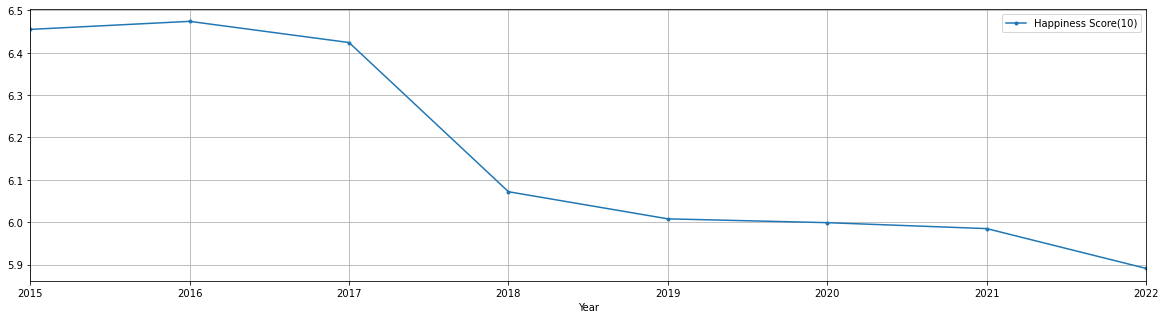

In [13]:
hh=['Happiness Score(10)']
df1[hh].plot(marker='.',figsize=(20,5),grid=True)

<AxesSubplot:xlabel='Year'>

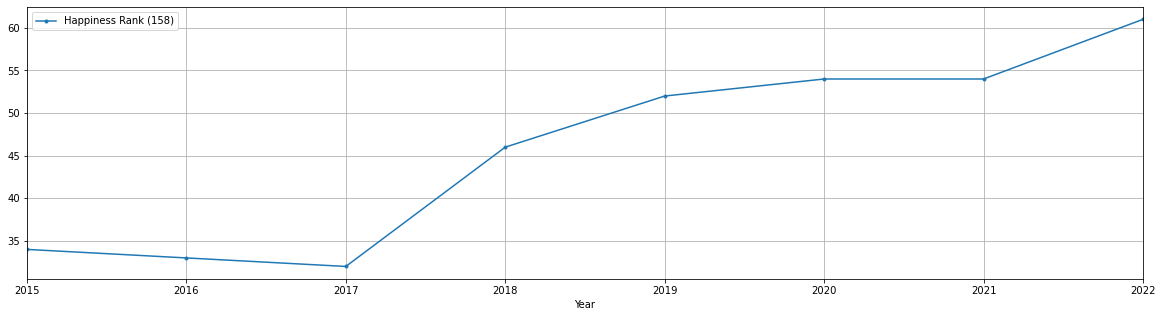

In [14]:
hh=['Happiness Rank (158)']
df1[hh].plot(marker='.',figsize=(20,5),grid=True)

In [15]:
df1.columns

Index(['Happiness Rank (158)', 'Happiness Score(10)',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'index_year', 'group_happy'],
      dtype='object')

In [16]:
df1=df1.rename(columns={'Happiness Rank (158)':'Happiness_Rank','Happiness Score(10)':'Happiness_Score','Economy (GDP per Capita)':'Economy',
                        'Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'})

In [17]:
df1.Happiness_Score.value_counts()

6.455    1
6.474    1
6.424    1
6.072    1
6.008    1
5.999    1
5.985    1
5.891    1
Name: Happiness_Score, dtype: int64

In [18]:
df1.columns

Index(['Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual', 'index_year',
       'group_happy'],
      dtype='object')

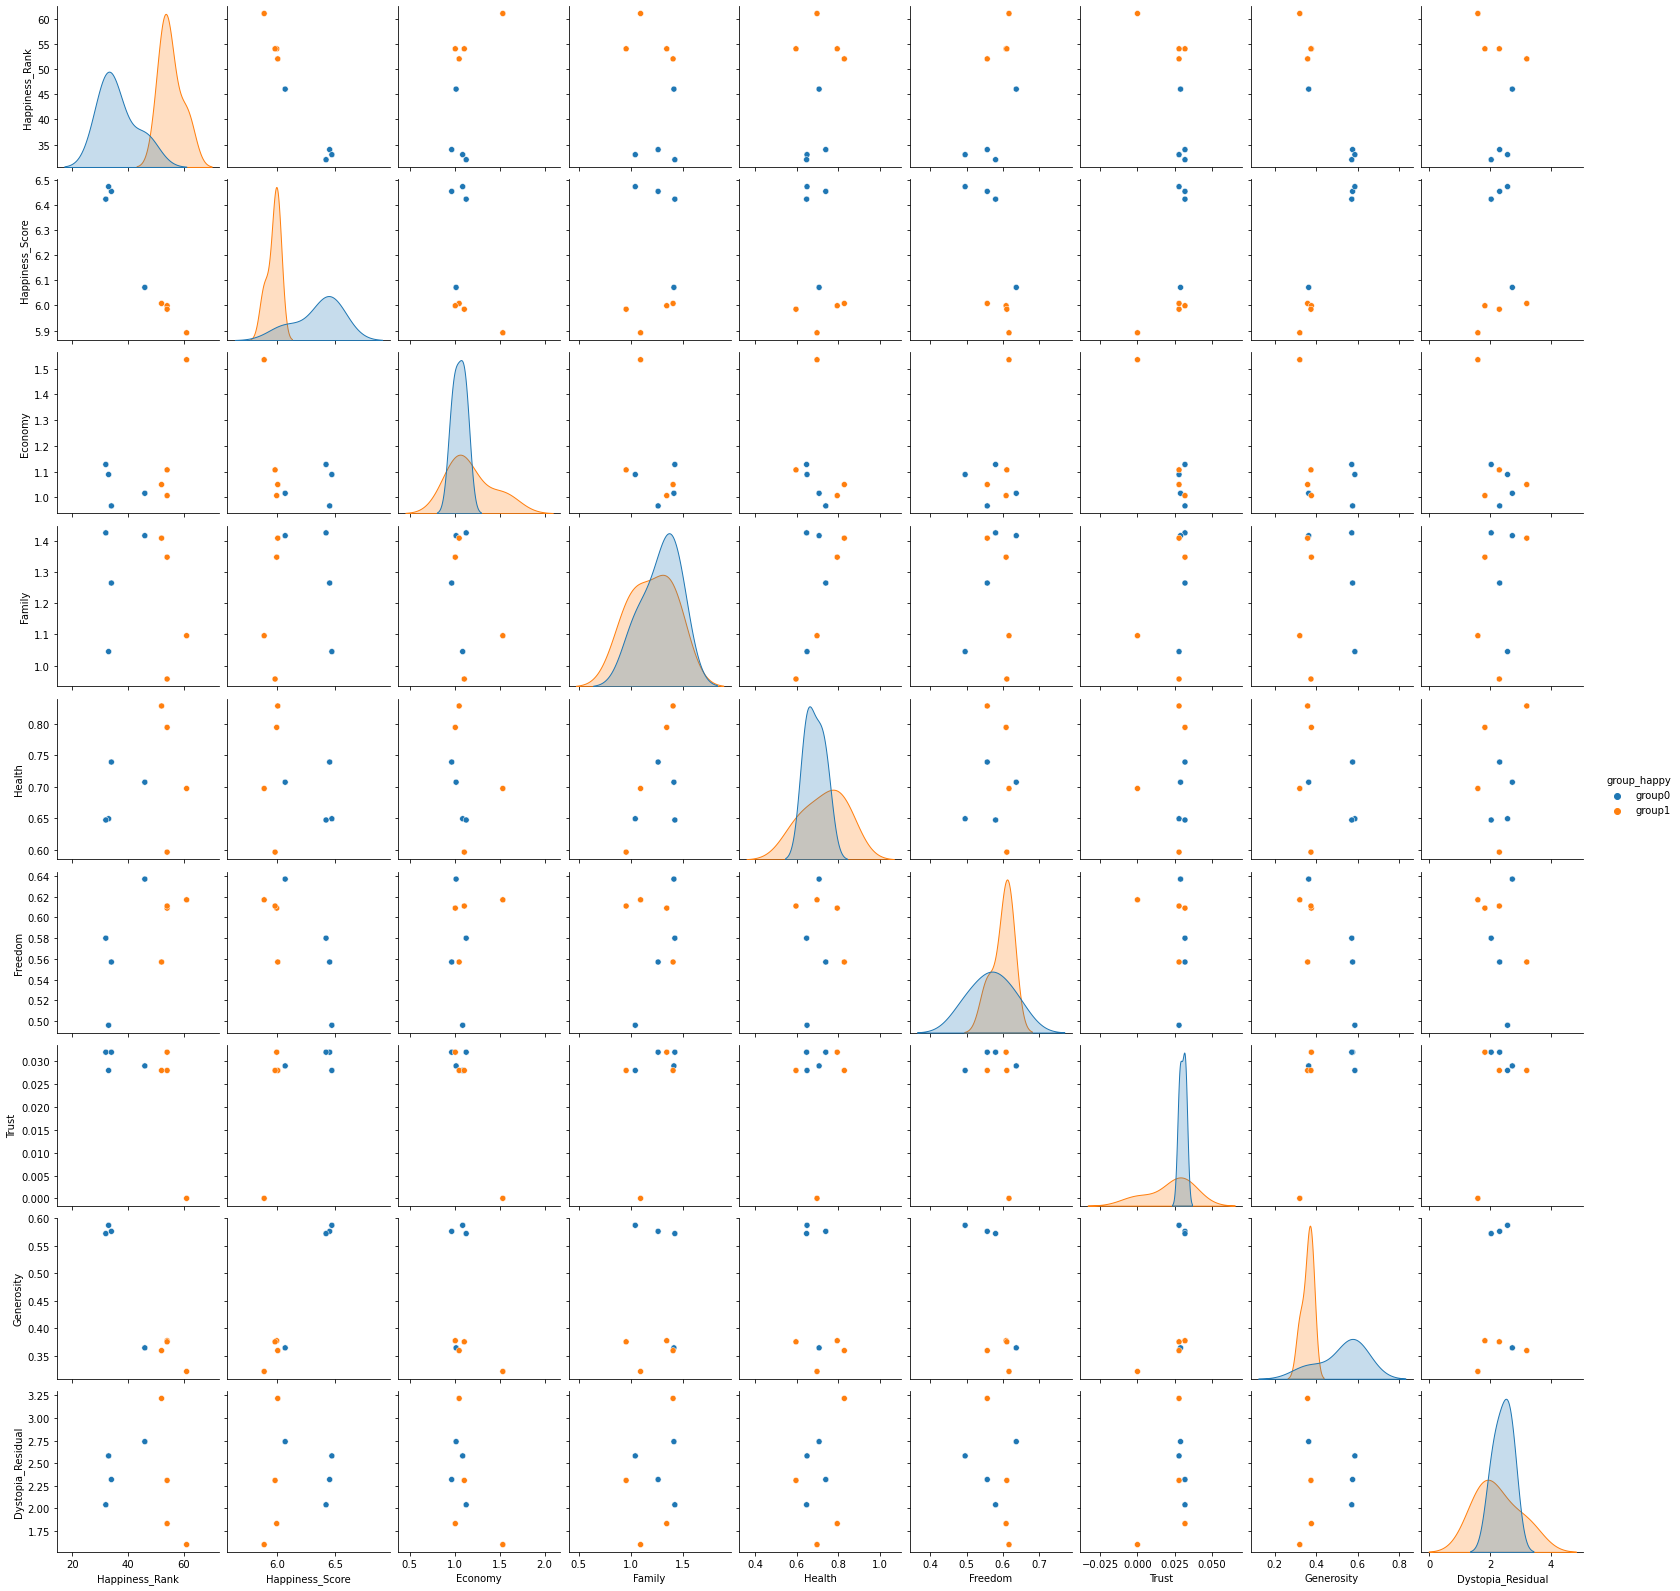

In [38]:
sns.pairplot(df1,vars=[ 'Happiness_Rank','Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']
        ,hue='group_happy'
            )

<AxesSubplot:xlabel='Family', ylabel='Economy'>

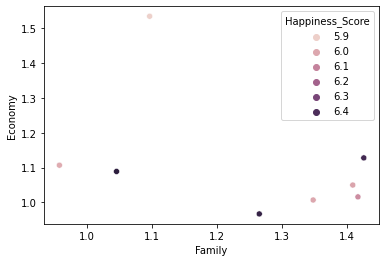

In [20]:
sns.scatterplot(data=df1, x='Family',y='Economy',hue='Happiness_Score')

In [21]:
df1.isnull().sum()

Happiness_Rank       0
Happiness_Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
index_year           0
group_happy          0
dtype: int64

In [22]:
df1.columns

Index(['Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual', 'index_year',
       'group_happy'],
      dtype='object')

select data

In [60]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [61]:
df1.columns

Index(['Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual', 'index_year',
       'group_happy', 'predict'],
      dtype='object')

In [79]:
cols=['Happiness_Rank','Generosity','Freedom']

array([[<AxesSubplot:title={'center':'Happiness_Rank'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Freedom'}>, <AxesSubplot:>]],
      dtype=object)

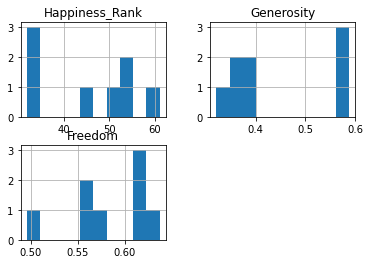

In [80]:
df1[cols].hist()

In [81]:
scaler=preprocessing.PowerTransformer(standardize=True)

S=scaler.fit_transform(df1[cols])
S[:4].round(3)

array([[-1.109,  1.235, -0.78 ],
       [-1.202,  1.288, -1.71 ],
       [-1.294,  1.215, -0.269],
       [ 0.016, -0.656,  1.564]])

In [82]:
X11=pd.DataFrame(S,columns=cols)
X11.head()

,Happiness_Rank,Generosity,Freedom
0,-1.109025,1.234557,-0.780153
1,-1.201713,1.287723,-1.710268
2,-1.294220,1.214515,-0.268578
3,0.015898,-0.656440,1.564454
4,0.585977,-0.731964,-0.780153


array([[<AxesSubplot:title={'center':'Happiness_Rank'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Freedom'}>, <AxesSubplot:>]],
      dtype=object)

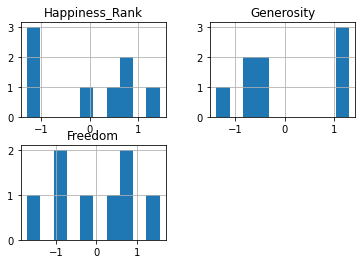

In [89]:
X11[cols].hist()

In [91]:
def sil_score(X11,from_k=2,to_k=6):
    sils=[]
    for k in range(from_k,to_k):
        m=KMeans(n_clusters=k)
        m.fit(X11)
        silhouette_avg=silhouette_score(X11,m.lables).round(3)
        sils.append([silhouette_avg],k)
    return sils

In [94]:
ss=sil_score(X11,2,5)
print(f'scores={ss}')


AttributeError: 'KMeans' object has no attribute 'lables'

**Modeling**

In [23]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [83]:
X=df1[['Happiness_Rank','Generosity','Freedom']]

In [84]:
model=KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [85]:
model.fit(X)

KMeans(n_clusters=2)

In [86]:
model.cluster_centers_

array([[33.        ,  0.57833333,  0.54433333],
       [53.4       ,  0.3592    ,  0.6062    ]])

In [87]:
model.labels_

array([0, 0, 0, 1, 1, 1, 1, 1])

In [52]:
df1.sample(5)

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,index_year,group_happy,predict
Year,,,,,,,,,,,,
2022-01-01,61.0,5.891,1.535,1.096,0.697,0.617,0.000,0.321,1.600,2022,group1,0
2021-01-01,54.0,5.985,1.107,0.957,0.596,0.611,0.028,0.375,2.309,2021,group1,0
2015-01-01,34.0,6.455,0.967,1.265,0.739,0.557,0.032,0.576,2.319,2015,group0,1
2019-01-01,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215,2019,group1,0
2016-01-01,33.0,6.474,1.089,1.045,0.649,0.496,0.028,0.587,2.580,2016,group0,1


In [53]:
predict1=model.labels_
df1['predict']=predict1
df1

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,index_year,group_happy,predict
Year,,,,,,,,,,,,
2015-01-01,34.0,6.455,0.967,1.265,0.739,0.557,0.032,0.576,2.319,2015,group0,0
2016-01-01,33.0,6.474,1.089,1.045,0.649,0.496,0.028,0.587,2.580,2016,group0,0
2017-01-01,32.0,6.424,1.128,1.426,0.647,0.580,0.032,0.572,2.040,2017,group0,0
2018-01-01,46.0,6.072,1.016,1.417,0.707,0.637,0.029,0.364,2.738,2018,group0,1
2019-01-01,52.0,6.008,1.050,1.409,0.828,0.557,0.028,0.359,3.215,2019,group1,1
2020-01-01,54.0,5.999,1.007,1.348,0.794,0.609,0.032,0.377,1.832,2020,group1,1
2021-01-01,54.0,5.985,1.107,0.957,0.596,0.611,0.028,0.375,2.309,2021,group1,1
2022-01-01,61.0,5.891,1.535,1.096,0.697,0.617,0.000,0.321,1.600,2022,group1,1


In [54]:
predict1=model.labels_
X['predict']=predict1
X

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\2249004738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['predict']=predict1


,Happiness_Rank,Happiness_Score,Generosity,Freedom,predict
Year,,,,,
2015-01-01,34.0,6.455,0.576,0.557,0
2016-01-01,33.0,6.474,0.587,0.496,0
2017-01-01,32.0,6.424,0.572,0.580,0
2018-01-01,46.0,6.072,0.364,0.637,1
2019-01-01,52.0,6.008,0.359,0.557,1
2020-01-01,54.0,5.999,0.377,0.609,1
2021-01-01,54.0,5.985,0.375,0.611,1
2022-01-01,61.0,5.891,0.321,0.617,1


**Evalution**

In [32]:
from sklearn.metrics import silhouette_score

In [ ]:
sns.heatmap(df1.groupby('predict').median(),cmap='Blues',linewidths=1)

In [ ]:
sns.heatmap(df1.groupby('predict').median(),cmap='Blues',linewidths=1
           ,square=True , annot=True , fmt='.2f')

**Deployment**